In [2]:
import gym
from cheetah_env import HalfCheetahEnvNew
import controllers
import main
import numpy as np
from dynamics import NNDynamicsModel
import tensorflow as tf
import cost_functions

In [3]:
env = HalfCheetahEnvNew()
obs_dim = env.observation_space.shape[0]
acs_dim = env.action_space.shape[0]

In [3]:
rand_cont = controllers.RandomController(env)
paths = main.sample(env,rand_cont,10,5000)
data = main.paths_to_array(paths)
normalization = main.compute_normalization(data)

Initializing random controller
Sampling trajectories...


In [4]:
sess = tf.Session()
dyn_model = NNDynamicsModel(env,2,32,tf.tanh,None,normalization,100,10000,5e-4,sess)
dyn_model.fit(data)

Initializing dynamics model
Fitting dynamics...
Iteration: 0, Loss: 1.17108
Iteration: 100, Loss: 0.621283
Iteration: 200, Loss: 0.43652
Iteration: 300, Loss: 0.245467
Iteration: 400, Loss: 0.183991
Iteration: 500, Loss: 0.164515
Iteration: 600, Loss: 0.151367
Iteration: 700, Loss: 0.113045
Iteration: 800, Loss: 0.106484
Iteration: 900, Loss: 0.105673
Iteration: 1000, Loss: 0.0938792
Iteration: 1100, Loss: 0.0886847
Iteration: 1200, Loss: 0.0871155
Iteration: 1300, Loss: 0.0784766
Iteration: 1400, Loss: 0.0789964
Iteration: 1500, Loss: 0.0730732
Iteration: 1600, Loss: 0.074545
Iteration: 1700, Loss: 0.072708
Iteration: 1800, Loss: 0.0773908
Iteration: 1900, Loss: 0.0705497
Iteration: 2000, Loss: 0.0692484
Iteration: 2100, Loss: 0.0499628
Iteration: 2200, Loss: 0.0674123
Iteration: 2300, Loss: 0.0629016
Iteration: 2400, Loss: 0.0620731
Iteration: 2500, Loss: 0.067043
Iteration: 2600, Loss: 0.0505387
Iteration: 2700, Loss: 0.0484665
Iteration: 2800, Loss: 0.0724647
Iteration: 2900, Loss:

In [5]:
mpc_cont = controllers.MPCcontroller(env,dyn_model,5,cost_functions.cheetah_cost_fn,10)

Initializing MPC controller


In [6]:
best_action = mpc_cont.get_action(np.ones((obs_dim)))
print(best_action)

[-0.27764907 -0.87124126 -0.54669701 -0.92035593 -0.19087558 -0.42720152]


Initializing random controller


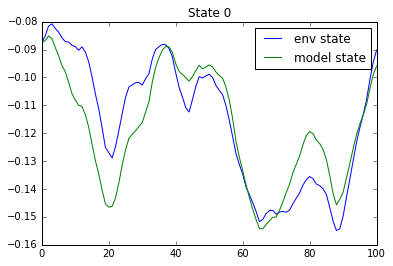

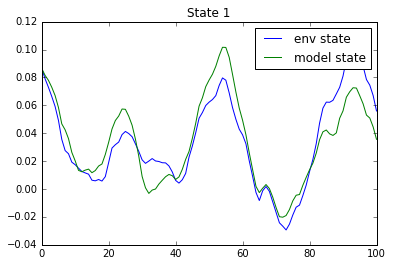

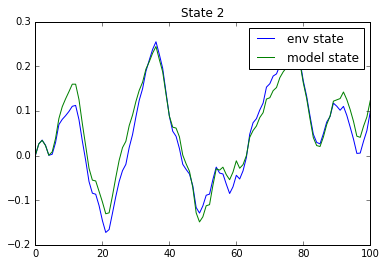

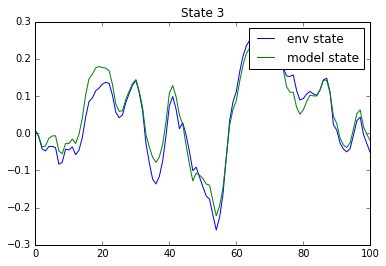

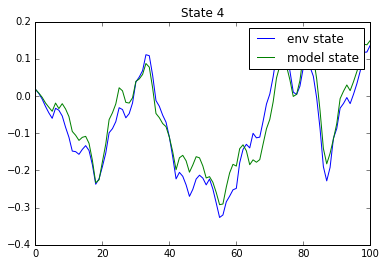

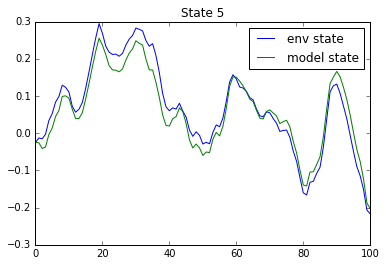

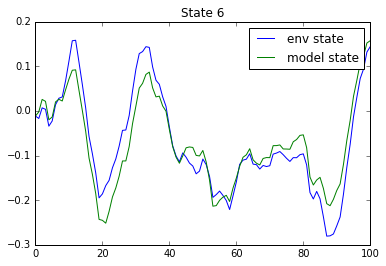

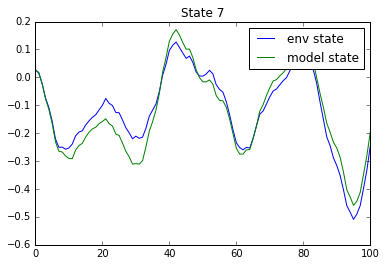

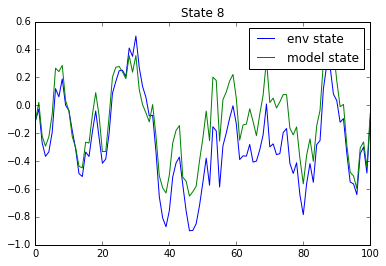

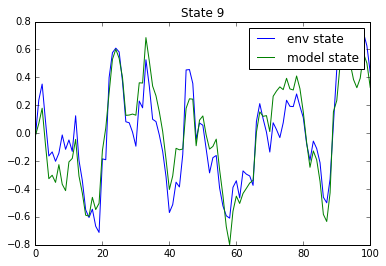

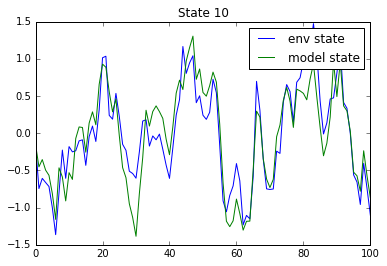

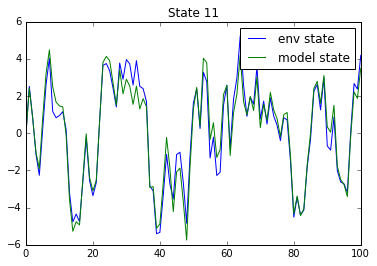

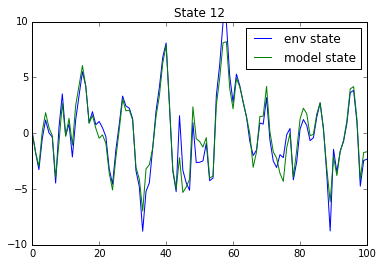

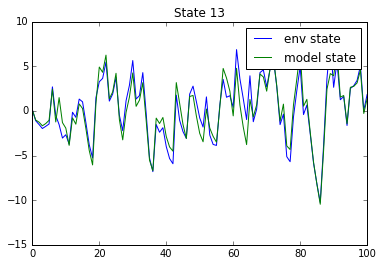

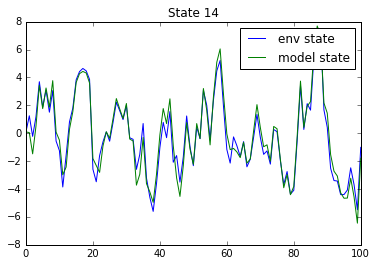

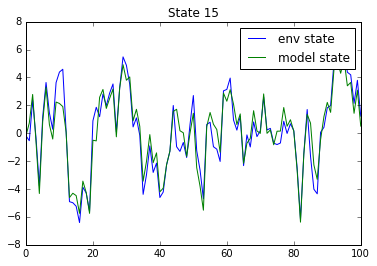

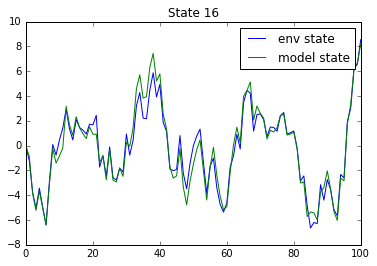

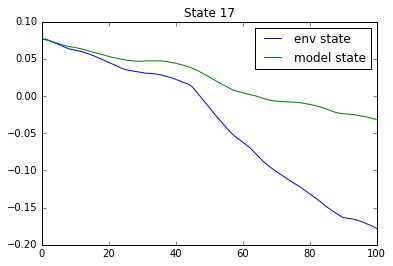

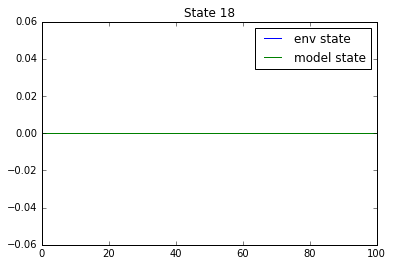

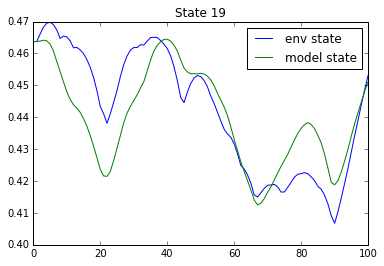

In [7]:
main.plot_comparison(env,dyn_model)

In [7]:
s_t = np.ones((5,10,obs_dim))
s_tp1 = np.ones((5,10,obs_dim))
a_t = 0.5*np.ones((5,10,acs_dim))
cost = cost_functions.trajectory_cost_fn(cost_functions.cheetah_cost_fn,s_t,a_t,s_tp1)
print(cost)

[ 150.  150.  150.  150.  150.  150.  150.  150.  150.  150.]


In [10]:
a = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(a.shape)
print(a)

(2, 2, 3)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [21]:
b = np.array([[1,2,3],[4,5,6]])
c = np.array([[7,8,9],[10,11,12]])
d = np.vstack([b[np.newaxis,:],c[np.newaxis,:]])
print(d.shape)
print(d)


(2, 2, 3)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
